Starting TOPSIS algorithm...


--------------------------------------------------
Norm of column 1: 19.3907
Normalized values for column 1: [0.4125685  0.25785531 0.36099744 0.46413956 0.56728169 0.30942637]
--------------------------------------------------

--------------------------------------------------
Norm of column 2: 18.5742
Normalized values for column 2: [0.37686733 0.16151457 0.26919095 0.48454371 0.5383819  0.48454371]
--------------------------------------------------

--------------------------------------------------
Norm of column 3: 13.1149
Normalized values for column 3: [0.15249857 0.533745   0.45749571 0.533745   0.22874786 0.38124643]
--------------------------------------------------

--------------------------------------------------
Norm of column 4: 10.7703
Normalized values for column 4: [0.09284767 0.46423835 0.37139068 0.27854301 0.64993368 0.37139068]
--------------------------------------------------

--------------------------------------------------
We

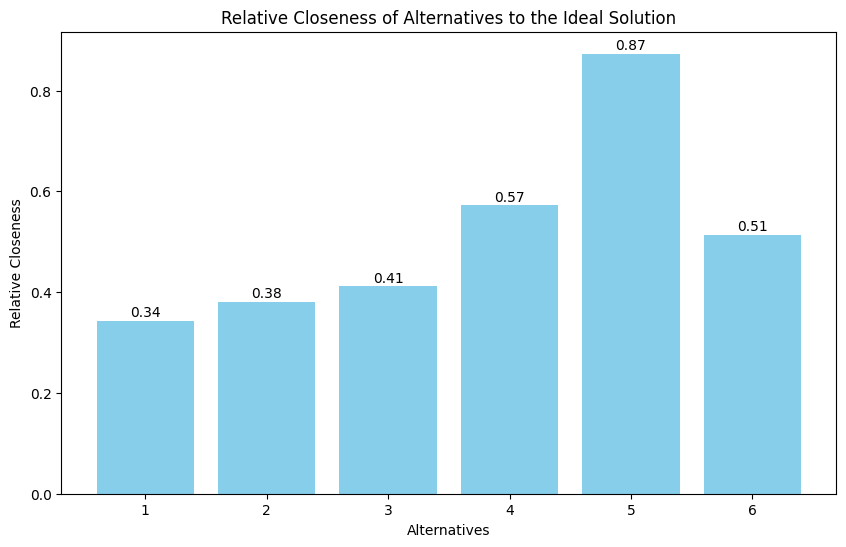

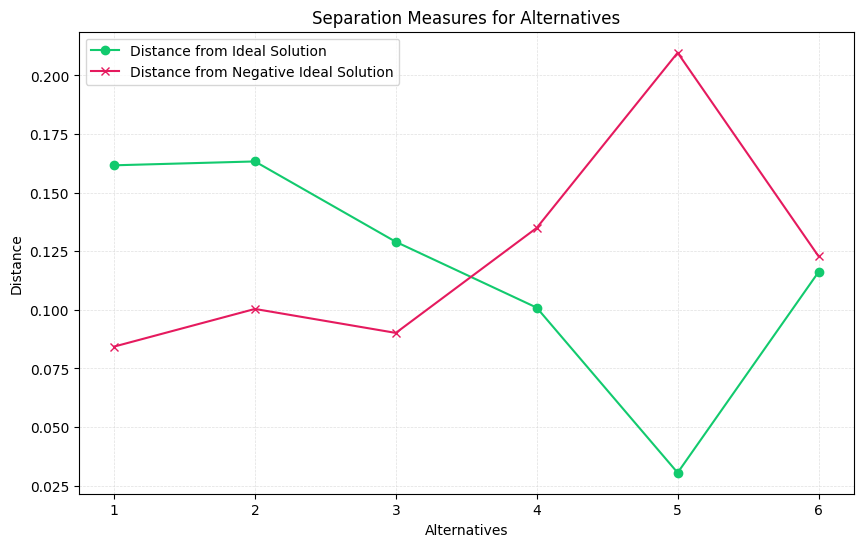

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_matrix(decision_matrix, verbose=False):
    """
    Normalizes the decision matrix using the Euclidean norm for each column.

    Args:
        decision_matrix (numpy.ndarray): The original decision matrix (alternatives x criteria).
        verbose (bool): If True, prints the normalization step.

    Returns:
        numpy.ndarray: The normalized decision matrix.
    """
    num_alternatives, num_criteria = decision_matrix.shape
    normalized_matrix = np.zeros_like(decision_matrix, dtype=float)

    # Compute Euclidean norm for each column and normalize
    for j in range(num_criteria):
        col_norm = np.linalg.norm(decision_matrix[:, j])  # Euclidean norm (sqrt(sum of squares))
        normalized_matrix[:, j] = decision_matrix[:, j] / col_norm
        if verbose:
            print(f"\n{'-'*50}")
            print(f"Norm of column {j + 1}: {col_norm:.4f}")
            print(f"Normalized values for column {j + 1}: {normalized_matrix[:, j]}")
            print(f"{'-'*50}")

    return normalized_matrix


def apply_weights(normalized_matrix, weights, verbose=False):
    """
    Applies weights to the normalized decision matrix.

    Args:
        normalized_matrix (numpy.ndarray): The normalized decision matrix.
        weights (list): The weights corresponding to each criterion.
        verbose (bool): If True, prints the weighted matrix.

    Returns:
        numpy.ndarray: The weighted decision matrix.
    """
    weighted_matrix = normalized_matrix * weights
    if verbose:
        print(f"\n{'-'*50}")
        print("Weighted decision matrix:")
        print(weighted_matrix)
        print(f"{'-'*50}")
    return weighted_matrix


def find_ideal_solutions(weighted_matrix, verbose=False):
    """
    Finds the ideal (best) and negative ideal (worst) solutions for each criterion.

    Args:
        weighted_matrix (numpy.ndarray): The weighted decision matrix.
        verbose (bool): If True, prints the ideal and negative ideal solutions.

    Returns:
        tuple: A tuple containing:
            - ideal_solution (numpy.ndarray): The ideal solution (max values for each criterion).
            - negative_ideal_solution (numpy.ndarray): The negative ideal solution (min values for each criterion).
    """
    ideal_solution = np.max(weighted_matrix, axis=0)  # Best values (maximum for benefit)
    negative_ideal_solution = np.min(weighted_matrix, axis=0)  # Worst values (minimum for benefit)

    if verbose:
        print(f"\n{'-'*50}")
        print(f"Ideal solution (Best values): {ideal_solution}")
        print(f"Negative ideal solution (Worst values): {negative_ideal_solution}")
        print(f"{'-'*50}")

    return ideal_solution, negative_ideal_solution


def calculate_distances(weighted_matrix, ideal_solution, negative_ideal_solution, verbose=False):
    """
    Calculates the Euclidean distance from each alternative to the ideal and negative ideal solutions.

    Args:
        weighted_matrix (numpy.ndarray): The weighted decision matrix.
        ideal_solution (numpy.ndarray): The ideal solution.
        negative_ideal_solution (numpy.ndarray): The negative ideal solution.
        verbose (bool): If True, prints the distances.

    Returns:
        tuple: A tuple containing:
            - dist_from_ideal (numpy.ndarray): Distance from each alternative to the ideal solution.
            - dist_from_negative_ideal (numpy.ndarray): Distance from each alternative to the negative ideal solution.
    """
    dist_from_ideal = np.linalg.norm(weighted_matrix - ideal_solution, axis=1)
    dist_from_negative_ideal = np.linalg.norm(weighted_matrix - negative_ideal_solution, axis=1)

    if verbose:
        print(f"\n{'-'*50}")
        print(f"Distances from Ideal Solution: {dist_from_ideal}")
        print(f"Distances from Negative Ideal Solution: {dist_from_negative_ideal}")
        print(f"{'-'*50}")

    return dist_from_ideal, dist_from_negative_ideal


def calculate_relative_closeness(dist_from_ideal, dist_from_negative_ideal, verbose=False):
    """
    Calculates the relative closeness of each alternative to the ideal solution.

    Args:
        dist_from_ideal (numpy.ndarray): Distance from each alternative to the ideal solution.
        dist_from_negative_ideal (numpy.ndarray): Distance from each alternative to the negative ideal solution.
        verbose (bool): If True, prints the relative closeness.

    Returns:
        numpy.ndarray: The relative closeness values for each alternative.
    """
    relative_closeness = dist_from_negative_ideal / (dist_from_ideal + dist_from_negative_ideal)

    if verbose:
        print(f"\n{'-'*50}")
        print(f"Relative closeness values: {relative_closeness}")
        print(f"{'-'*50}")

    return relative_closeness


def rank_alternatives(relative_closeness, verbose=False):
    """
    Ranks the alternatives based on their relative closeness to the ideal solution.

    Args:
        relative_closeness (numpy.ndarray): The relative closeness of each alternative to the ideal solution.
        verbose (bool): If True, prints the ranking step.

    Returns:
        numpy.ndarray: The ranked indices of the alternatives (1st is the best).
    """
    rankings = np.argsort(relative_closeness)[::-1]  # Sort in descending order
    if verbose:
        print(f"\n{'-'*50}")
        print(f"Rankings (1st is best): {rankings + 1}")
        print(f"{'-'*50}")
    return rankings


def plot_relative_closeness(relative_closeness):
    """
    Plots the relative closeness of each alternative as a bar chart.
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, len(relative_closeness) + 1), relative_closeness, color='skyblue')

    # Add numbers inside the bars near the top
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.03, f'{height:.2f}',
                 ha='center', va='top', fontsize=10, color='black')

    plt.xlabel('Alternatives')
    plt.ylabel('Relative Closeness')
    plt.title('Relative Closeness of Alternatives to the Ideal Solution')
    plt.xticks(range(1, len(relative_closeness) + 1))
    plt.show()


def plot_distances(dist_from_ideal, dist_from_negative_ideal):
    """
    Plots the distances of each alternative from the ideal and anti-ideal solutions.
    """
    alternatives = range(1, len(dist_from_ideal) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(alternatives, dist_from_ideal, label='Distance from Ideal Solution', marker='o', color='#12ca6e')
    plt.plot(alternatives, dist_from_negative_ideal, label='Distance from Negative Ideal Solution', marker='x', color='#e51a5e')
    plt.xlabel('Alternatives')
    plt.ylabel('Distance')
    plt.title('Separation Measures for Alternatives')
    plt.legend()
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()


# Main TOPSIS function
def topsis(decision_matrix, weights, plot=True, verbose=False):
    """
    Perform the TOPSIS method for multi-criteria decision making.

    Args:
        decision_matrix (list of lists): Each row represents an alternative, and each column represents a criterion.
        weights (list): Weights for each criterion, the sum should be 1.
        plot (bool): If True, generates plots of the results.
        verbose (bool): If True, prints intermediate calculations and steps.

    Prints:
        Rankings and relative closeness of alternatives.
    """
    print("Starting TOPSIS algorithm...\n")

    # Convert decision matrix to numpy array
    decision_matrix = np.array(decision_matrix)

    # Normalize the decision matrix
    normalized_matrix = normalize_matrix(decision_matrix, verbose)

    # Apply weights
    weighted_matrix = apply_weights(normalized_matrix, weights, verbose)

    # Find ideal and negative ideal solutions
    ideal_solution, negative_ideal_solution = find_ideal_solutions(weighted_matrix, verbose)

    # Calculate distances
    dist_from_ideal, dist_from_negative_ideal = calculate_distances(weighted_matrix, ideal_solution, negative_ideal_solution, verbose)

    # Calculate relative closeness
    relative_closeness = calculate_relative_closeness(dist_from_ideal, dist_from_negative_ideal, verbose)

    # Rank alternatives
    rankings = rank_alternatives(relative_closeness, verbose)

    # Print final results
    print("\n" + "="*50)
    print("\n*TOPSIS Results:*")
    print("\nFinal Rankings of Alternatives (Best to Worst):", rankings + 1)
    print("\nRelative Closeness of Each Alternative:", relative_closeness)
    print("\n" + "="*50)
    print()

    # Plot results if required
    if plot:
        plot_relative_closeness(relative_closeness)
        plot_distances(dist_from_ideal, dist_from_negative_ideal)


# Example Usage:

# Decision matrix with 6 alternatives and 4 criteria
decision_matrix = [[8, 7, 2, 1],
                   [5, 3, 7, 5],
                   [7, 5, 6, 4],
                   [9, 9, 7, 3],
                   [11, 10, 3, 7],
                   [6, 9, 5, 4]]

# Normalized weights for the 4 criteria
weights = [0.35, 0.3, 0.1, 0.25]  # Criteria weights, normalized to sum to 1

# Run TOPSIS with verbose output
topsis(decision_matrix, weights, plot=True, verbose=True)